# Analyse chaussure Nike

- Données : produits mis au rebut, caractéristiques, descriptions, notes et avis de la section chaussures du site Web de Nike pour les produits masculins et féminins. Données acquises sur plus de 1 200 produits et plus de 30 000 avis.
- Objectif : Comprendre l'offre produit de Nike, sa composition en termes de quantité, de prix et de type de produits. Ainsi que pour comprendre ses forces et ses faiblesses perçues et la manière dont il apporte de la valeur à ses clients.

## Sommaire:
* [Installation packages](#1-bullet)
* [Importation et nettoyage des données](#2-bullet)
* [Analyse chiffre et catégorie et graphique](#3-bullet)

## Install Required Packages <a class="anchor" id="1-bullet"></a>

- Ouvrir **Terminal**, cd le nom du projet and et éxecuter la commande:
 - `pip install -r requirements.txt`

## Importation et nettoyage des données  <a class="anchor" id="2-bullet"></a>

In [1]:
# Import des lib nécéssaires

import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import squarify
plt.style.use('ggplot')
import re
import json
import string
import requests
import urllib.request
%matplotlib inline

In [2]:
# Obtenir toutes les données des fichiers csv et les joindre

df_men = pd.read_csv('./data/nike_shoes_men.csv', header=0, error_bad_lines = False, quotechar='"')
df_woman0 = pd.read_csv('./data/nike_shoes_woman0.csv', header=0, error_bad_lines = False, quotechar='"')
df_woman1 = pd.read_csv('./data/nike_shoes_woman1.csv', header=0, error_bad_lines = False, quotechar='"')

df = pd.concat([df_men, df_woman0, df_woman1])


/var/folders/4b/g83qtk4x08nbc9j48pc6nkbc0000gn/T/ipykernel_59099/3263673825.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_men = pd.read_csv('./data/nike_shoes_men.csv', header=0, error_bad_lines = False, quotechar='"')
/var/folders/4b/g83qtk4x08nbc9j48pc6nkbc0000gn/T/ipykernel_59099/3263673825.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_woman0 = pd.read_csv('./data/nike_shoes_woman0.csv', header=0, error_bad_lines = False, quotechar='"')
/var/folders/4b/g83qtk4x08nbc9j48pc6nkbc0000gn/T/ipykernel_59099/3263673825.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_woman1 = pd.read_csv('./data/nike_shoes_woman1.csv', header=0, error_bad_lines = False, quotechar='"')


In [3]:
# Remplacer les valeurs de curseur qui ne sont pas correctes
df = df.replace('[A-Za-z]', value = {"size" : None, "comfort" : None, "durability" : None}, regex=True)

In [4]:
df[df['size'].str.contains('[A-Za-z]', na=False)]

,id_,gender,title,url,category,price,description,description_long,n_reviews,score,size,comfort,durability,r_title,r_raiting,r_body,r_date


In [5]:
for i in df['category'].unique():
    print(i)

Firm-Ground Soccer Cleat
Custom Shoe
Men's Baseball Shoe
Men's Baseball Cleat
Men's Shoe
Men's Trail Running Shoe
Golf Shoe (Wide)
Custom Men's Shoe
Hiking Shoe
Indoor/Court Soccer Shoe
nan
Multi-Ground Soccer Cleat
Basketball Shoe
Skate Shoe
Custom Men's Running Shoe
Men's Football Cleat
Men's Shoes
Women's Shoe
Running Shoe
Men's Hard Court Tennis Shoe
Men's Running Shoe
Turf Soccer Shoe
Artificial-Turf Soccer Shoe
Men's Slide
Duck Boot
Shoe
Men's HIIT Class Shoe
Men's Training Shoe
Men's Endurance Class Shoe
Training Shoe
Men’s Hard Court Tennis Shoe
Custom Soccer Cleat
Men's Golf Shoe (Wide)
Men's Golf Shoe
Women's Racing Shoe
Men's Printed Slide
Men's Boot
Custom Basketball Shoe
Golf Shoe
Turf Lacrosse Cleat
Men's Skate Shoe
Custom Running Shoe
Men's Shower Slide
Track Spike
Men's Flip Flop
Men's Trail Shoe
Custom Lifestyle Shoe
Unisex Throwing Shoe
Men's Indoor Cycling Shoe
Racing Spike
Unisex Jumping Spike
Racing Shoe
Unisex Throwing Spike
Racing Spikes
Unisex Track Spike
Men's 

In [6]:
# Créez des catégories plus significatives en supprimant la redondance, en agrégeant des catégories similaires,
# et en ajoutant des catégories plus informatives

df = df.replace({'category' : { 'Shoe' : "Men's Shoe", "Men's Shoes" : "Men's Shoe"}})
df = df.replace({'category' : { ".+Running.+" : "Running Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Basketball.+" : "Basketball Shoe"}}, regex = True)
df = df.replace({'category' : { "Basketball.+" : "Basketball Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Baseball.+" : "Baseball Shoe"}}, regex = True)
df = df.replace({'category' : { "Baseball.+" : "Baseball Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Hiking.+" : "Hiking Shoe"}}, regex = True)
df = df.replace({'category' : { "HIIT.+" : "Training Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Skate.+" : "Skate Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Football.+" : "Football Shoe"}}, regex = True)
df = df.replace({'category' : { "Football.+" : "Football Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Slide.+" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Slide" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Boot.+" : "Boot"}}, regex = True)
df = df.replace({'category' : { ".+Boot$" : "Boot"}}, regex = True)
df = df.replace({'category' : { ".+Lacrosse.+" : "Lacrosse Shoe"}}, regex = True)
df = df.replace({'category' : { "Lacrosse.+" : "Lacrosse Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Lifestyle.+" : "Lifestyle Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Cycling.+" : "Cycling Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Thong.+" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Thong" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Flip Flop.+" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Flip Flop" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Flip-Flop" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Sandal.+" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Sandal" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Slide" : "Sandal"}}, regex = True)
df = df.replace({'category' : { "Slip$" : "Sandal"}}, regex = True) 
df = df.replace({'category' : { "^Slip-On$" : "Sandal"}}, regex = True)
df = df.replace({'category' : { ".+Softball.+" : "Softball Shoe"}}, regex = True)
df = df.replace({'category' : { "Softball.+" : "Softball Shoe"}}, regex = True)                
df = df.replace({'category' : { ".+Golf.+" : "Golf Shoe"}}, regex = True)
df = df.replace({'category' : { "Golf.+" : "Golf Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Soccer.+" : "Soccer Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Tennis.+" : "Tennis Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Training.+" : "Training Shoe"}}, regex = True)
df = df.replace({'category' : { "Custom.+" : "Custom Shoe"}}, regex = True)
df = df.replace({'category' : { "High Top" : "Lifestyle Shoe"}}, regex = True)
df = df.replace({'category' : { "Lifestyle Shoe \(Extra Wide\)" : "Lifestyle Shoe"}}, regex = True)
df = df.replace({'category' : { "Print Slide" : "Printed Slide"}}, regex = True)
df = df.replace({'category' : { "Racing.+" : "Racing Shoe"}}, regex = True)
df = df.replace({'category' : { "Unisex Racing Shoe" : "Racing Shoe"}}, regex = True)
df = df.replace({'category' : { ".+Track.+" : "Track Shoe"}}, regex = True)
df = df.replace({'category' : { "^Track Spike$" : "Track Shoe"}}, regex = True)
df = df.replace({'category' : { "Unisex Shoe" : "Lifestyle Shoe"}}, regex = True)
df['category'] = df['category'].str.replace("Men's","")
df['category'] = df['category'].str.replace("Women's","")
df['category'] = df['category'].str.strip()
df = df.replace({'category' : { "^Shoe" : "Lifestyle Shoe"}}, regex = True)

In [7]:
# Conversion de certains types de données de colonnes en catégorie correcte

df = df.astype({"gender": 'category', 'category': 'category',
                "size": 'float64', 'comfort': 'float64', 'durability': 'float64', 'r_date' : 'datetime64'})

print(df.shape)
print(df.dtypes)
df.describe()

(35960, 17)
id_                          int64
gender                    category
title                       object
url                         object
category                  category
price                      float64
description                 object
description_long            object
n_reviews                  float64
score                      float64
size                       float64
comfort                    float64
durability                 float64
r_title                     object
r_raiting                  float64
r_body                      object
r_date              datetime64[ns]
dtype: object


,id_,price,n_reviews,score,size,comfort,durability,r_raiting
count,35960.000000,35950.000000,35519.000000,35519.000000,35138.000000,35138.000000,35138.000000,35519.000000
mean,387.172442,102.204256,438.456347,4.587212,47.497083,85.052365,73.543557,4.585715
std,209.561510,50.799157,582.444342,0.279373,11.031876,10.063183,13.583633,0.900332
min,1.000000,21.000000,1.000000,1.000000,14.500000,25.000000,20.000000,1.000000
25%,193.000000,65.000000,57.000000,4.500000,41.500000,80.000000,68.000000,5.000000
50%,415.000000,90.000000,183.000000,4.600000,48.500000,86.000000,76.000000,5.000000
75%,552.000000,125.000000,652.000000,4.800000,54.000000,93.000000,83.500000,5.000000
max,739.000000,400.000000,2298.000000,5.000000,100.000000,100.000000,100.000000,5.000000


In [8]:
# Ajustement de la fonction de taille car 0 et 100 sont un mauvais ajustement (trop petit ou trop grand, respectivement)
# avis par l'utilisateur alors que 50 est un ajustement parfait.

df['size_adj'] = [abs(x-50) for x in df['size']]

## Handling missing values

In [9]:
# Avoir une idée de l'endroit où se trouvent les valeurs manquantes

df.isnull().sum()

id_                    0
gender                 0
title                 10
url                    0
category              10
price                 10
description           10
description_long     146
n_reviews            441
score                441
size                 822
comfort              822
durability           822
r_title             2319
r_raiting            441
r_body               441
r_date               441
size_adj             822
dtype: int64

Il y a 10 éléments qui n'ont pas pu être extraits correctement car le formatage HTML de la page a changé. De plus, certains articles n'ont pas de longues descriptions, de commentaires, un résultat de curseur de taille/confort/durabilité.

Nous devrions supprimer les 10 articles de la liste car ils ne fourniront aucune valeur, c'est une petite partie du total de plus de 1 200 produits. De plus, les autres valeurs manquantes sont correctes car elles ne sont pas présentes dans la page du produit, tous les champs n'ont pas d'informations dans la page du produit.

In [10]:
df.dropna(subset=['title'], inplace=True)

## Analyse des chiffres et catégories et graphique <a class="anchor" id="3-bullet"></a>

In [11]:
# Histogramme des fonctionnalités
# df.hist(bins = 20, figsize= (20,15))

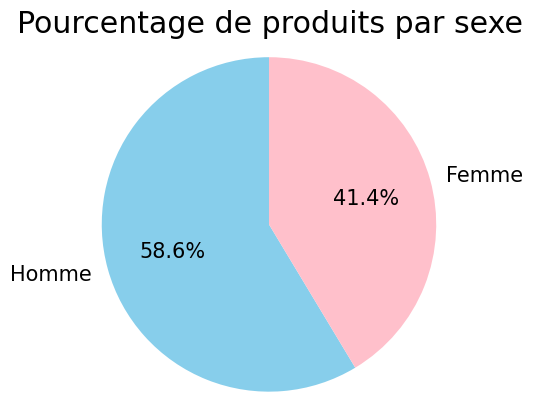

In [12]:
# Graphique de distribution des produits par sexe

products_men = df[df['gender'] == 'men']['id_'].nunique()
products_woman = df[df['gender'] == 'woman']['id_'].nunique()
# Diagramme circulaire, où les tranches seront ordonnées et tracées dans le sens antihoraire :
labels = 'Homme', 'Femme'
sizes = [products_men, products_woman]

fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 15.0
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=('skyblue','pink'))
ax1.axis('equal')  # Un rapport hauteur/largeur égal garantit que le graphique est dessinée sous forme de cercle.
plt.title('Pourcentage de produits par sexe')
plt.savefig('pie1.png', dpi=300)
plt.show()

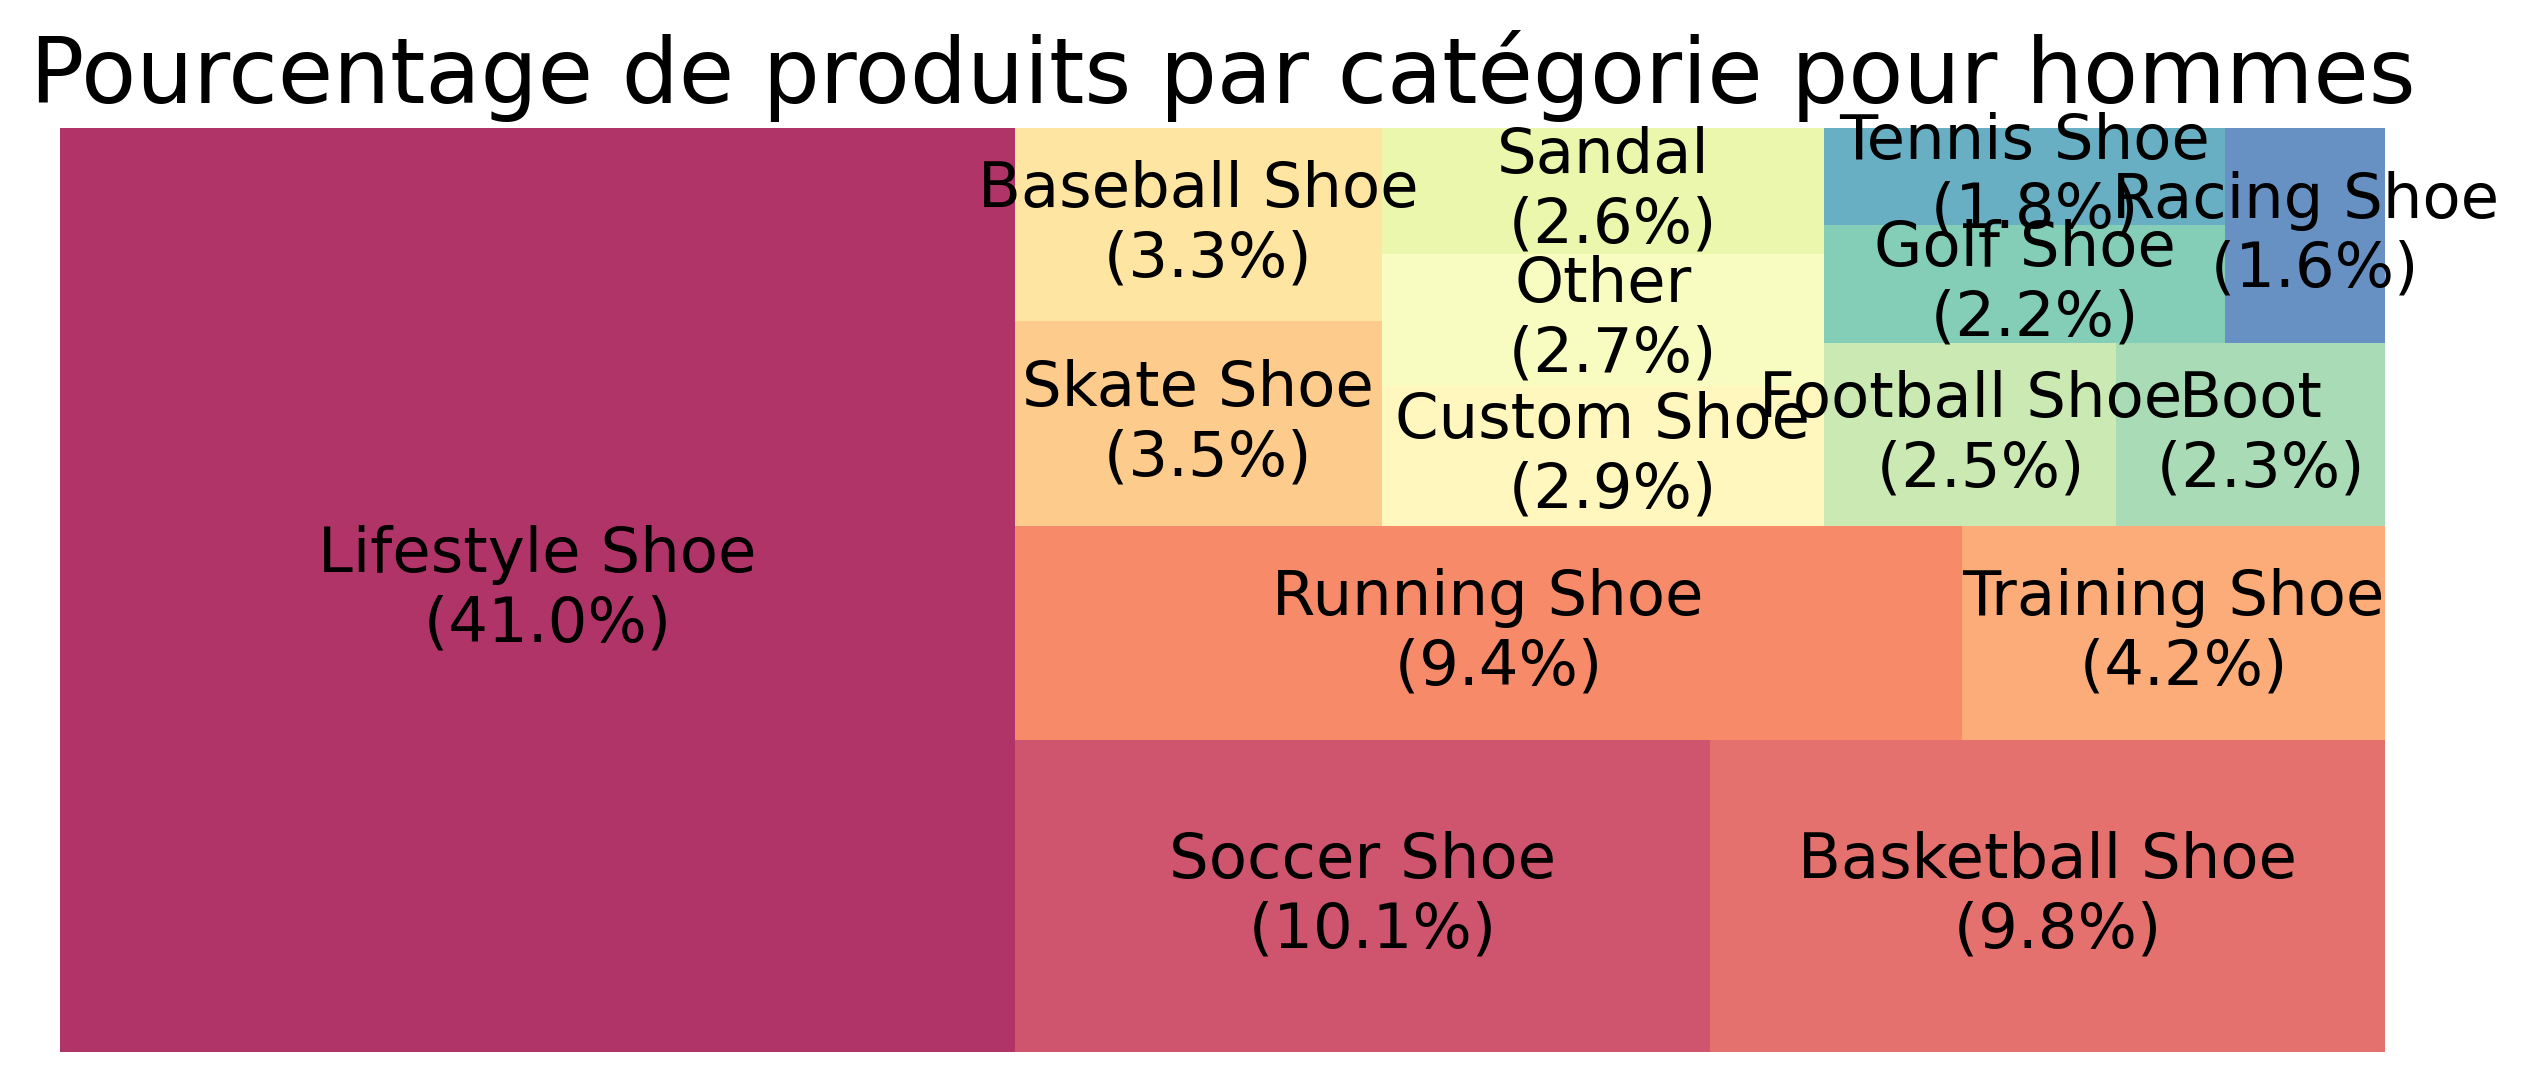

In [13]:
# 1. Treemap du pourcentage de produits par catégorie pour les hommes
df1 = df[df['gender']=='men'].groupby('category')['id_'].nunique().reset_index(name='counts')
df1['counts'] = (100. * df1['counts'] / df1['counts'].sum()).round(1)
df1['category'] = np.where(df1.counts < 1,'Other', df1.category)
df1 = df1.groupby('category').sum().sort_values(by = 'counts', ascending=False).reset_index()
labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1],1)) + "%)", axis=1)
sizes = df1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Dessin du tracé
plt.figure(figsize=(10,4), dpi= 300)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decoration
plt.title('Pourcentage de produits par catégorie pour hommes')
plt.axis('off')
plt.show()

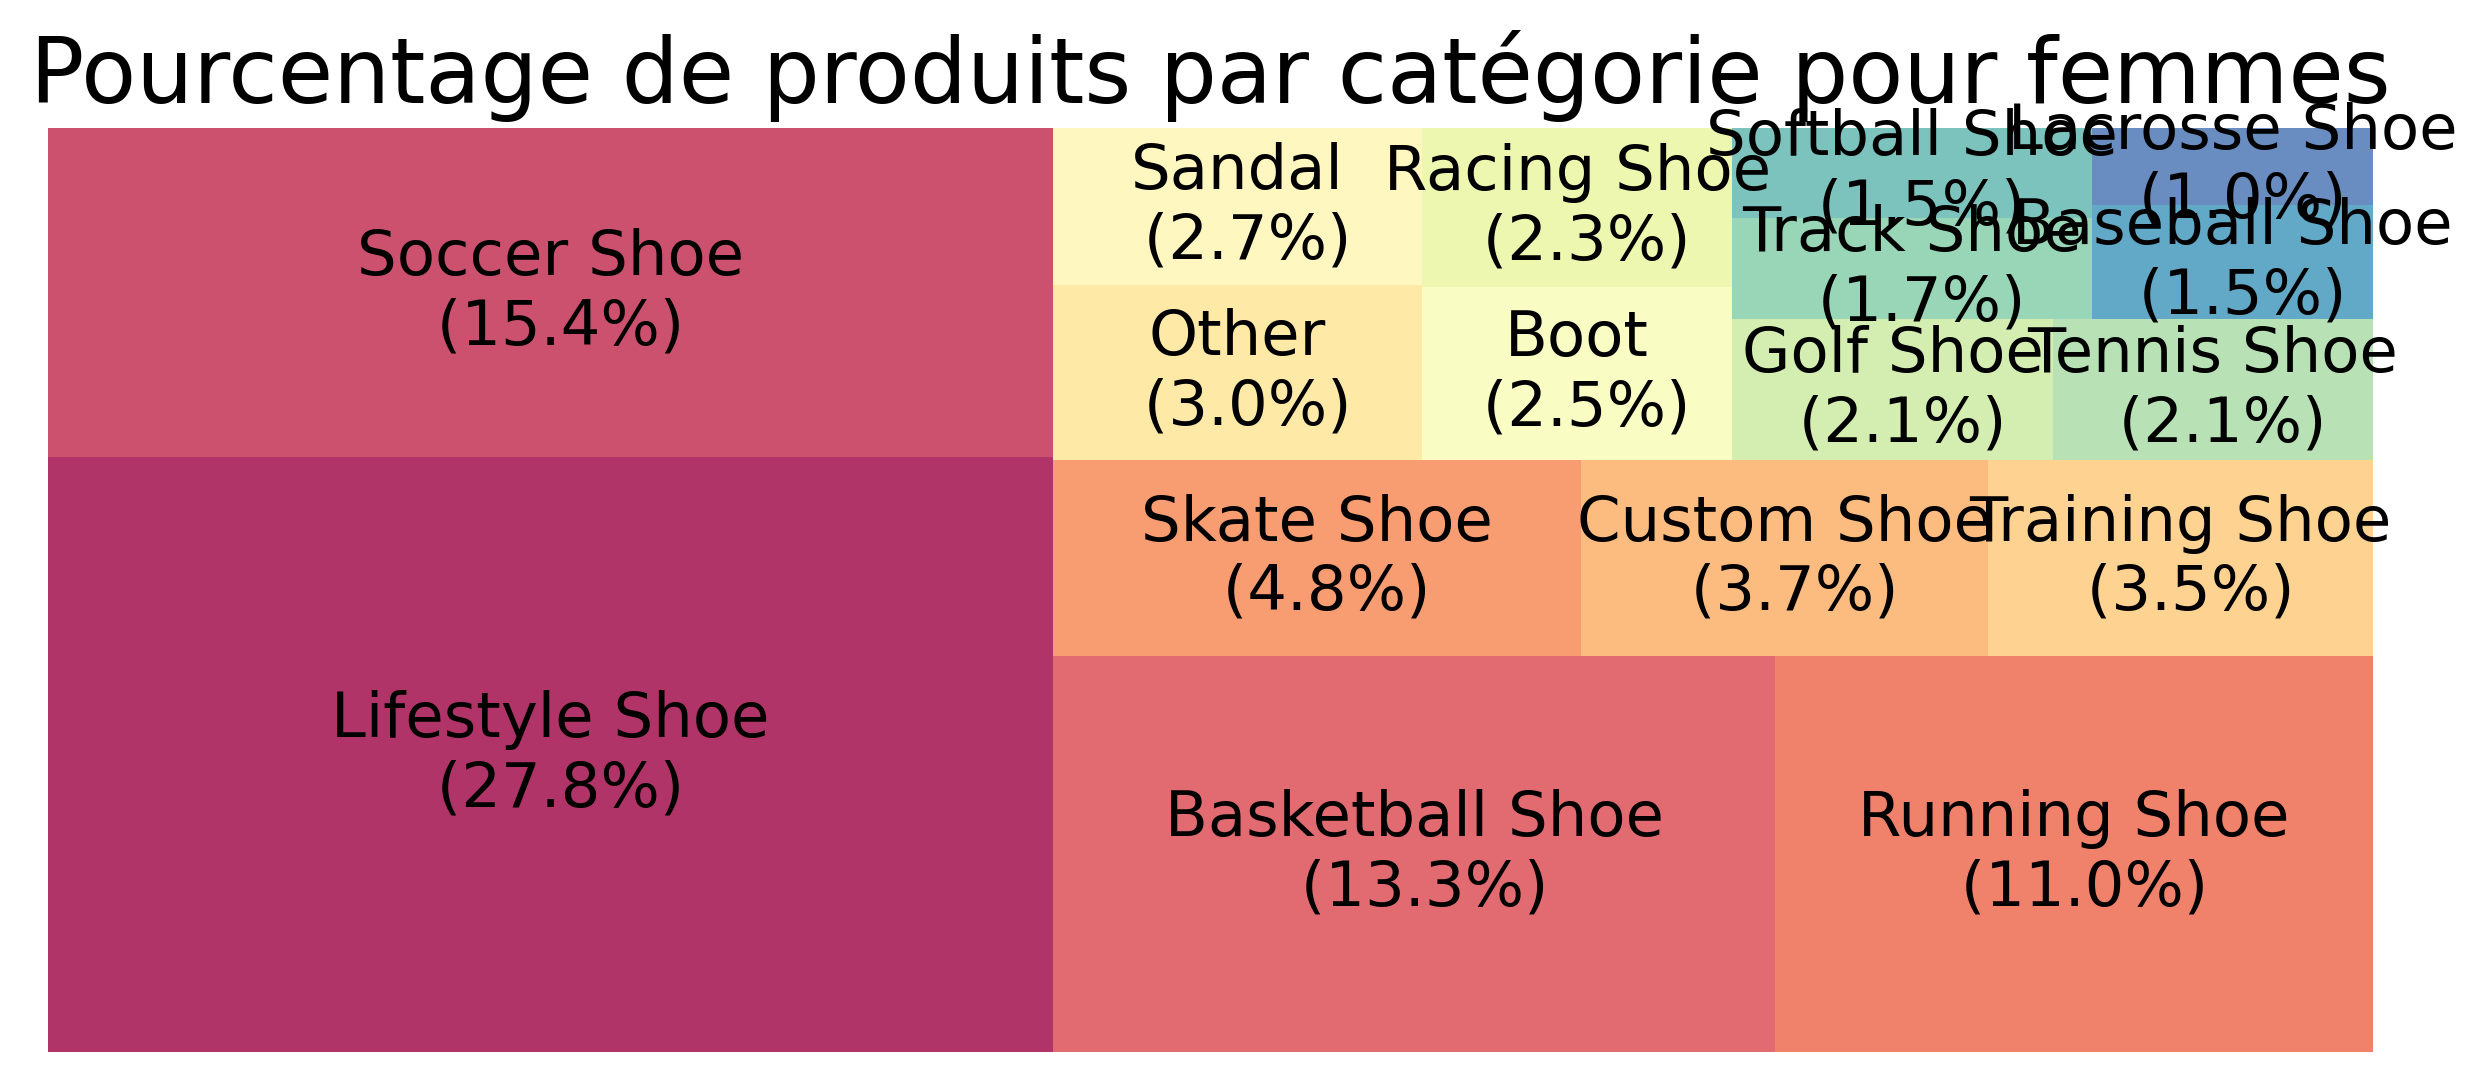

In [14]:
# 1. Treemap de pourcentage de produits par catégorie pour femme
df1 = df[df['gender']=='woman'].groupby('category')['id_'].nunique().reset_index(name='counts')
df1['counts'] = (100. * df1['counts'] / df1['counts'].sum()).round(1)
df1['category'] = np.where(df1.counts < 1,'Other', df1.category)
df1 = df1.groupby('category').sum().sort_values(by = 'counts', ascending=False).reset_index()
labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1],1)) + "%)", axis=1)
sizes = df1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Dessin du tracé
plt.figure(figsize=(10,4), dpi= 300)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decoration
plt.title('Pourcentage de produits par catégorie pour femmes')
plt.axis('off')
plt.show()

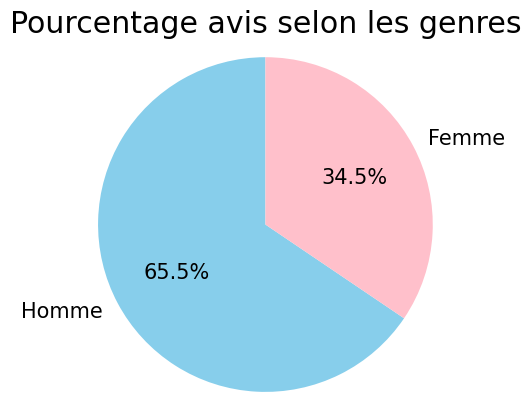

In [15]:
# 2. Graphique de répartition des avis par sexe

reviews_men = df[(df['gender'] == 'men') & (~df['n_reviews'].isnull())]['id_'].count()
reviews_woman = df[(df['gender'] == 'woman') & (~df['n_reviews'].isnull())]['id_'].count()

# Diagramme circulaire, où les tranches seront ordonnées et tracées dans le sens antihoraire :
labels = 'Homme', 'Femme'
sizes = [reviews_men, reviews_woman]
plt.rcParams['font.size'] = 15.0
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=('skyblue','pink'))
ax1.axis('equal')  # Un rapport hauteur/largeur égal garantit que le graphique est dessinée sous forme de cercle.
plt.title('Pourcentage avis selon les genres')
plt.savefig('pie2.png', dpi=300)
plt.show()

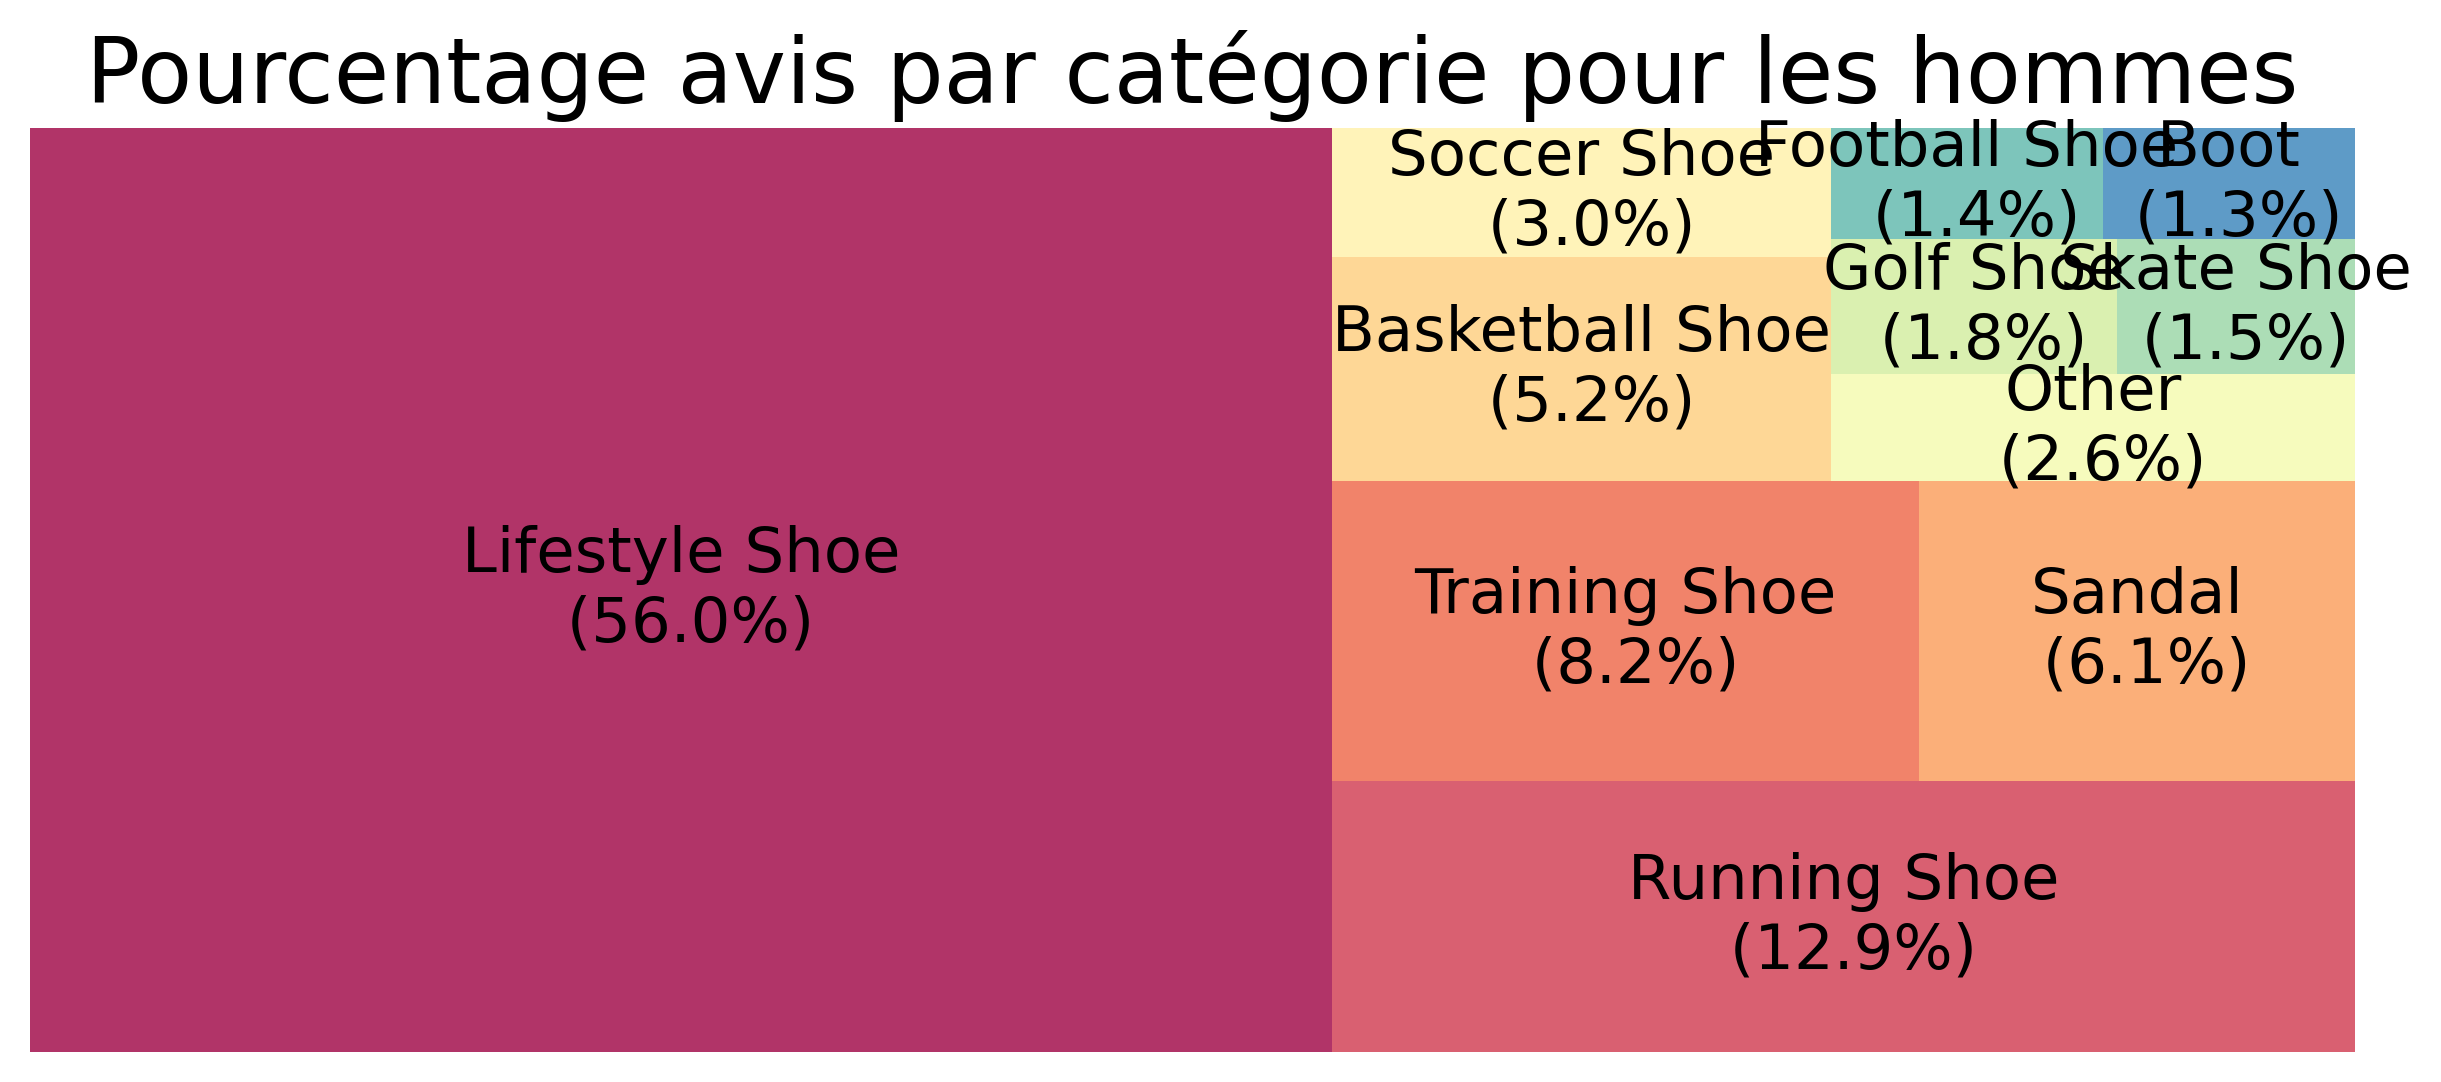

In [16]:
# 2. Treemap du pourcentage d'avis par catégorie pour les hommes
df1 = df[(df['gender']=='men') & (~df['n_reviews'].isnull())].groupby('category').size().reset_index(name='counts')
df1['counts'] = (100. * df1['counts'] / df1['counts'].sum()).round(1)
df1['category'] = np.where(df1.counts < 1,'Other', df1.category)
df1 = df1.groupby('category').sum().sort_values(by = 'counts', ascending=False).reset_index()
labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1],1)) + "%)", axis=1)
sizes = df1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Dessin tracé
plt.figure(figsize=(10,4), dpi= 300)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decoration
plt.title('Pourcentage avis par catégorie pour les hommes')
plt.axis('off')
plt.show()

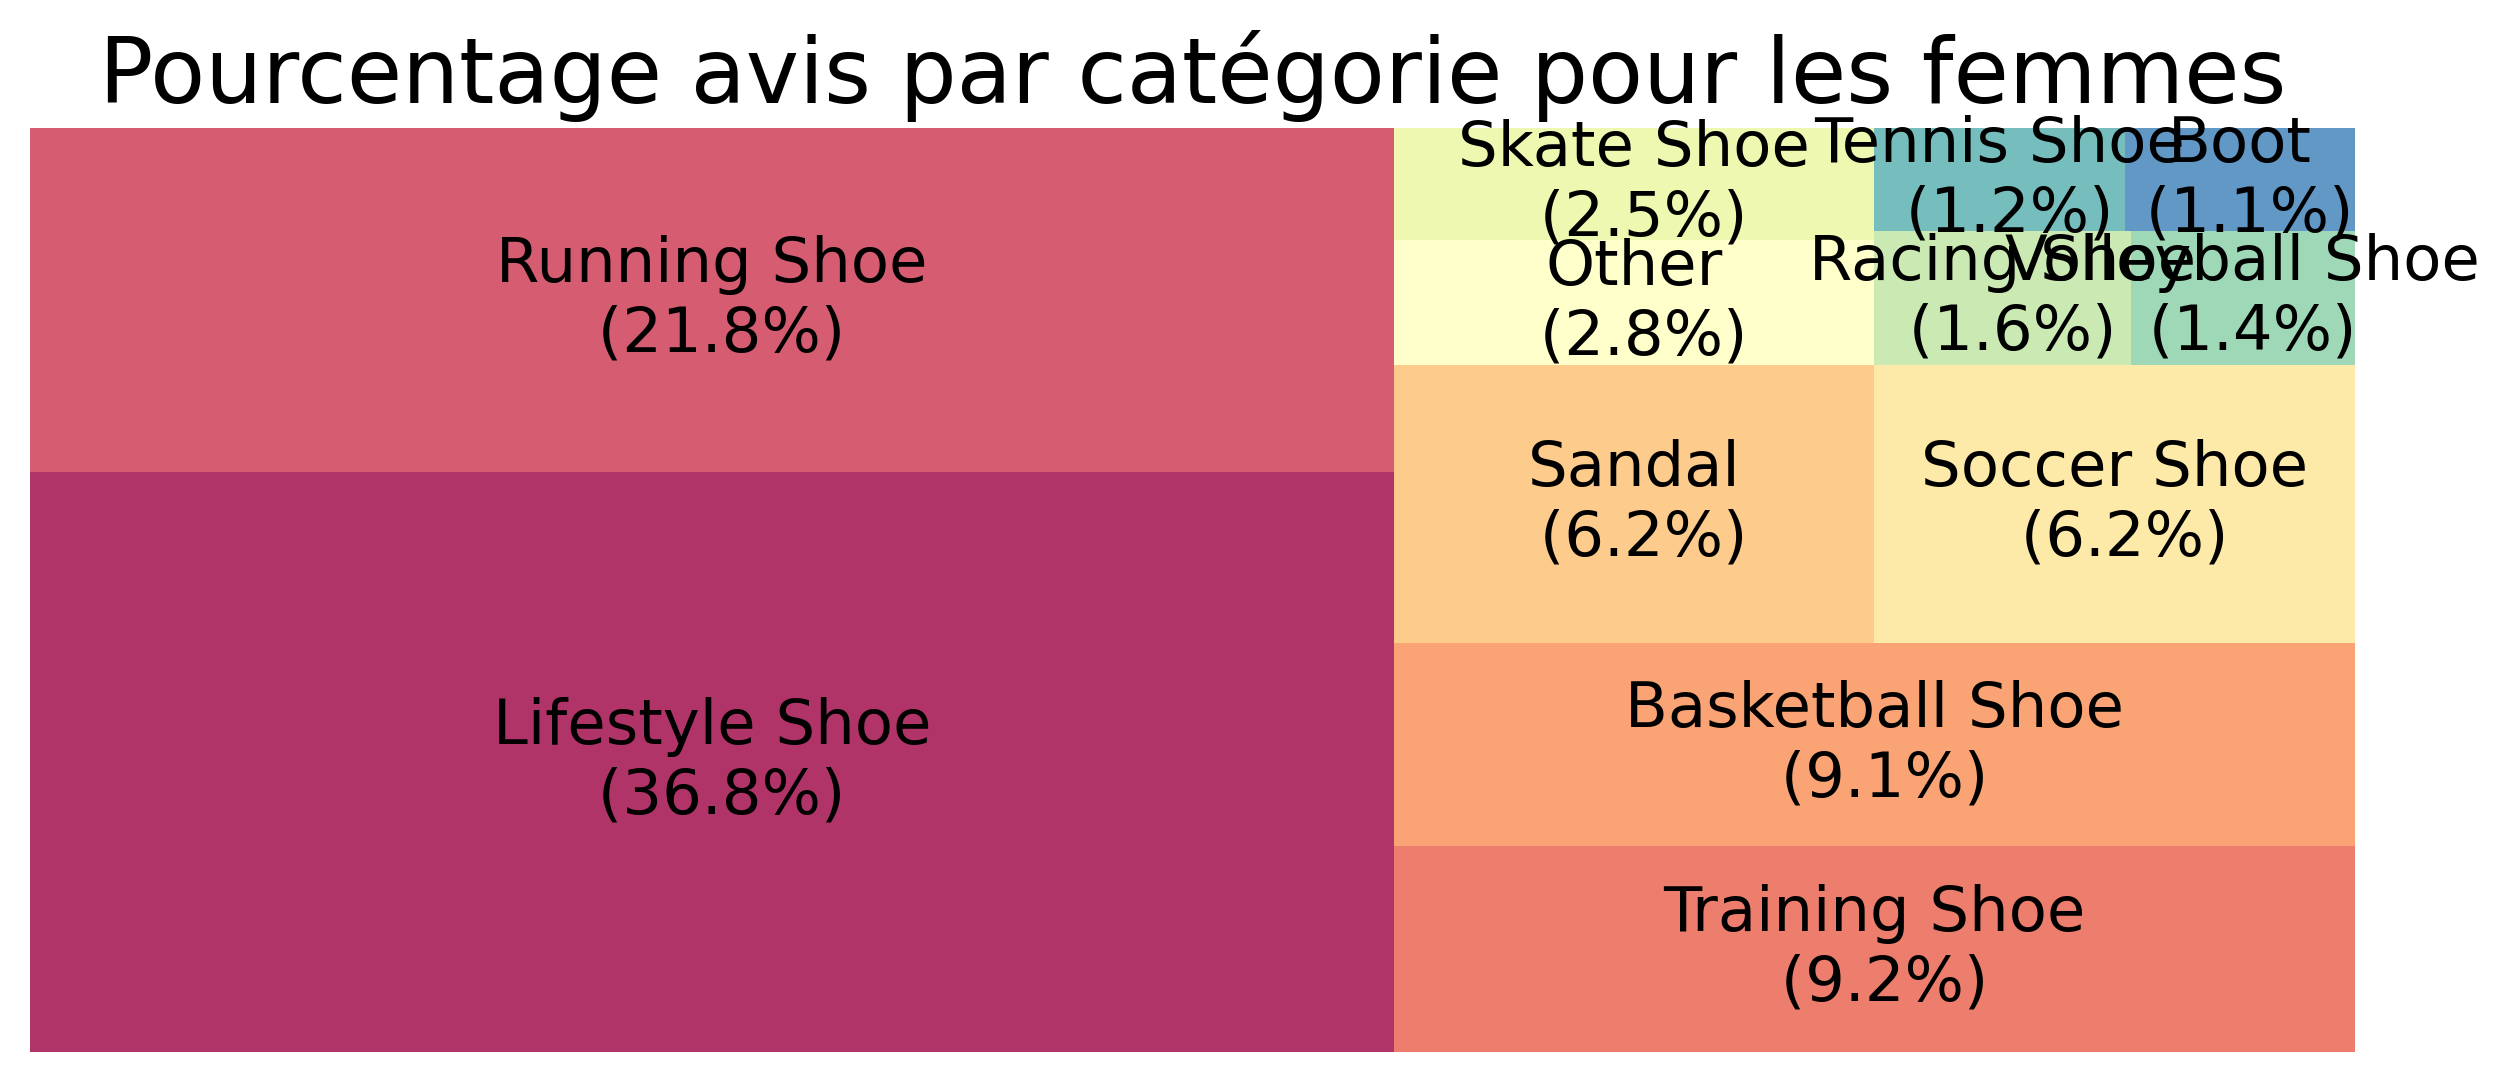

In [17]:
# 1. Treemap du pourcentage d'avis par catégorie pour femme
df1 = df[(df['gender']=='woman') & (~df['n_reviews'].isnull())].groupby('category').size().reset_index(name='counts')
df1['counts'] = (100. * df1['counts'] / df1['counts'].sum()).round(1)
df1['category'] = np.where(df1.counts < 1,'Other', df1.category)
df1 = df1.groupby('category').sum().sort_values(by = 'counts', ascending=False).reset_index()
labels = df1.apply(lambda x: str(x[0]) + "\n (" + str(round(x[1], 1)) + "%)", axis=1)
sizes = df1['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Dessin tracé
plt.figure(figsize=(10,4), dpi= 300)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decoration
plt.title('Pourcentage avis par catégorie pour les femmes')
plt.axis('off')
plt.show()

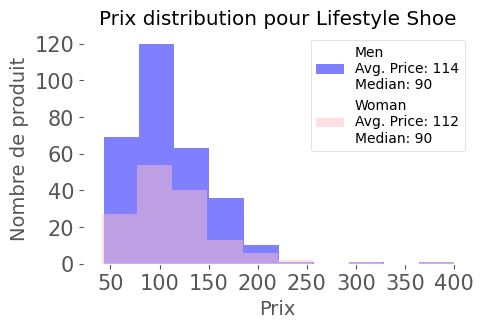

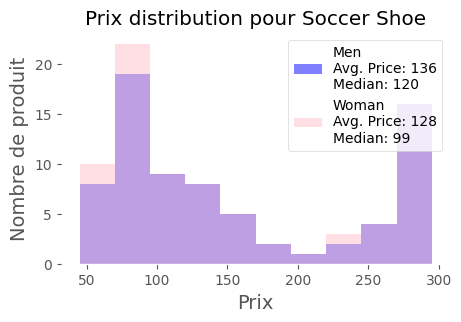

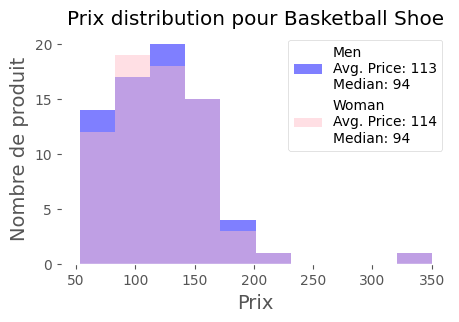

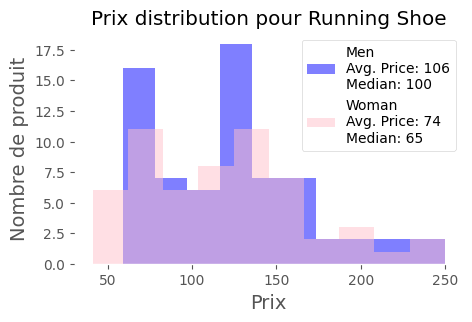

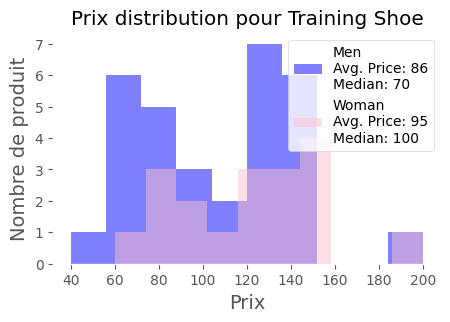

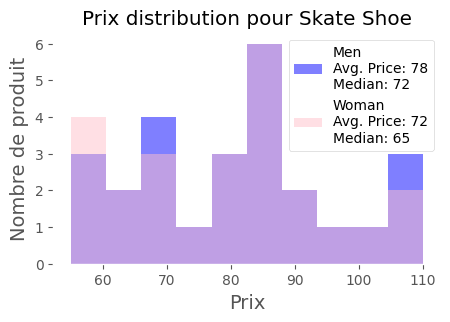

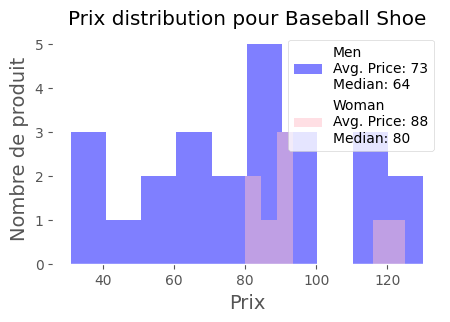

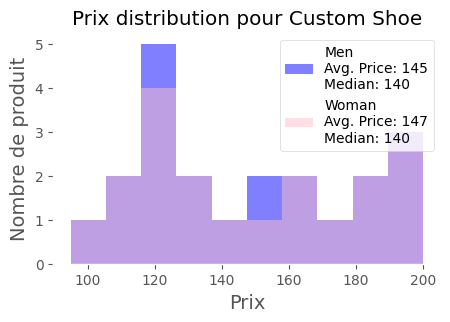

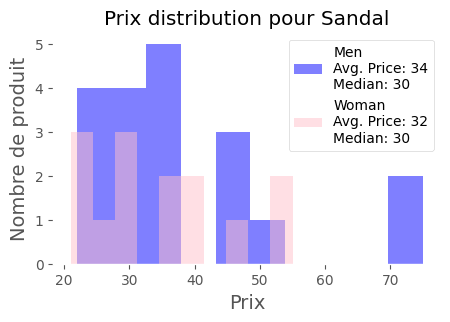

In [18]:
# 3. Histogrammes des prix par catégories supérieures selon le sexe par histogramme.

categories = ['Lifestyle Shoe', 'Soccer Shoe', 'Basketball Shoe', 'Running Shoe','Training Shoe', 'Skate Shoe',
              'Baseball Shoe', 'Custom Shoe', 'Sandal']

for category in categories:
    # Organizing the data
    df1 = df[(df['gender']=='men') & (df['category']==category)].groupby('id_')['price'].mean()
    avg_price_men = str(round(df[(df['gender']=='men') & (df['category']==category)]['price'].mean()))
    median_price_men = str(round(df[(df['gender']=='men') & (df['category']==category)]['price'].median()))
    df2 = df[(df['gender']=='woman') & (df['category']==category)].groupby('id_')['price'].mean()
    avg_price_woman = str(round(df[(df['gender']=='woman') & (df['category']==category)]['price'].mean()))
    median_price_woman = str(round(df[(df['gender']=='woman') & (df['category']==category)]['price'].median()))
    
    # Plotting
    fig, ax = plt.subplots(figsize=(5,3), dpi= 100)
    plt.rcParams['font.size'] = 10
    plt.hist(df1, alpha=0.5, label="Men\nAvg. Price: "+avg_price_men+"\nMedian: "+median_price_men, color= 'blue')
    plt.hist(df2, alpha=0.5, label="Woman\nAvg. Price: "+avg_price_woman+"\nMedian: "+median_price_woman, color= 'pink')
    ax.set_facecolor("white")
    plt.xlabel("Prix", size=14)
    plt.ylabel("Nombre de produit", size=14)
    plt.title("Prix distribution pour " + category)
    plt.legend(loc='upper right', facecolor='white')
    plt.savefig('hist_prices_'+category+'.png', dpi= 200, bbox_inches = 'tight')

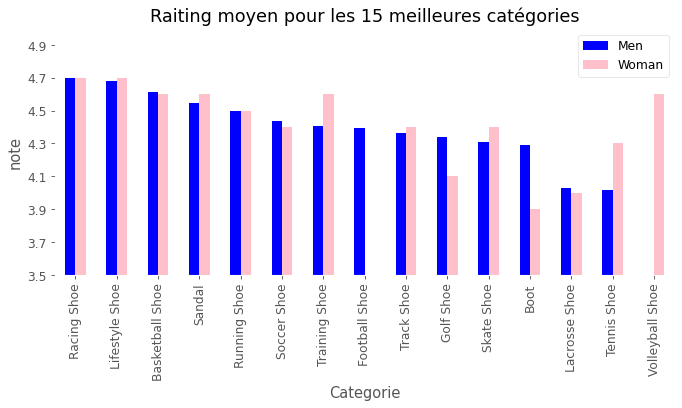

In [23]:
# 4. Note d'évaluation moyenne du graphique à barres par catégorie et par sexe

# Top catégories par nombre d'avis
categories = df[(~df['n_reviews'].isnull())].groupby('category').agg({'r_raiting' : 'count'})\
.sort_values(by = 'r_raiting', ascending=False).reset_index().head(15)
categories = list(categories['category'])

# Data pour homme
avg_score_men = df[(df['gender'] == 'men') & (~df['n_reviews'].isnull()) & (df['category'].isin(categories))]\
.groupby('category').agg({'r_raiting' : 'mean'})
avg_score_men.dropna(inplace=True, axis=0)

# Data pour femme
avg_score_woman = df[(df['gender'] == 'woman') & (~df['n_reviews'].isnull()) & (df['category'].isin(categories))]\
.groupby('category').agg({'r_raiting' : 'mean'})
avg_score_woman = round(avg_score_woman,1)
avg_score_woman.dropna(inplace=True, axis=0)

names=['Men', 'Woman']
df1 = pd.concat([avg_score_men, avg_score_woman], axis=1)
df1.columns = names

# Plotting
plt.rcParams["figure.dpi"] = 80
df1.sort_values(by = 'Men', ascending=False).plot(kind="bar",figsize=(10,4), color=('blue','pink')).set_facecolor('xkcd:white')
plt.ylabel('note')
axes = plt.gca()
axes.set_ylim([3.5,5])
plt.yticks(np.arange(3.5, 5, 0.2))
plt.xlabel('Categorie')
plt.title('Raiting moyen pour les 15 meilleures catégories')
plt.legend(loc='upper right', facecolor='white')
plt.savefig('reivew_score_by_category.png', dpi = 300, bbox_inches = 'tight')

/var/folders/4b/g83qtk4x08nbc9j48pc6nkbc0000gn/T/ipykernel_59099/482794730.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(dfi)
/var/folders/4b/g83qtk4x08nbc9j48pc6nkbc0000gn/T/ipykernel_59099/482794730.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(dfi)
/var/folders/4b/g83qtk4x08nbc9j48pc6nkbc0000gn/T/ipykernel_59099/482794730.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(dfi)
/var/folders/4b/g83qtk4x08nbc9j48pc6nkbc0000gn/T/ipykernel_59099/482794730.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(dfi)
/var/folders/4b/g83qtk4x08nbc9j48pc6nkbc0000gn/T/ipy

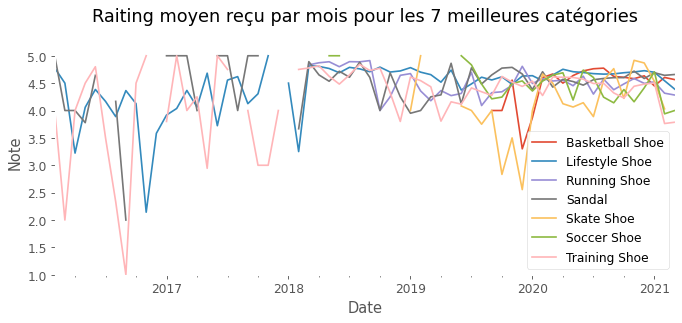

In [21]:
# 5. Série chronologique du score moyen par mois par catégorie

# Top catégories par nombre d'avis
categories = df[(~df['n_reviews'].isnull())].groupby('category').agg({'r_raiting' : 'count'})\
.sort_values(by = 'r_raiting', ascending=False).reset_index().head(7)
categories = list(categories['category'])

# Creation Dataframe avec donnée
df1=pd.DataFrame()
for category in categories:
    dfi = df[df['category']==category].groupby(['r_date']).agg({'r_raiting' : 'mean'})
    dfi.reset_index(inplace=True)
    dfi.dropna(axis=0, inplace = True)
    dfi = dfi.resample("M", on='r_date').mean()
    dfi['category'] = category
    df1=df1.append(dfi)

df1=df1.pivot_table(columns='category',index='r_date' ,values ='r_raiting',fill_value=0)
df1.replace(0, np.nan, inplace=True)

# Graph
plt.rcParams["figure.dpi"] = 80
df1.plot(kind="line",figsize=(10,4)).set_facecolor('xkcd:white')
plt.ylabel('Note')
axes = plt.gca()
axes.set_ylim([3.5,5.5])
plt.yticks(np.arange(1, 5.5, 0.5))
plt.xlabel('Date')
plt.title('Raiting moyen reçu par mois pour les 7 meilleures catégories')
plt.legend(loc='lower right', facecolor='White')
plt.savefig('Raiting moyen reçu par mois pour les 7 meilleures Categories.png', dpi = 300, bbox_inches = 'tight')
    

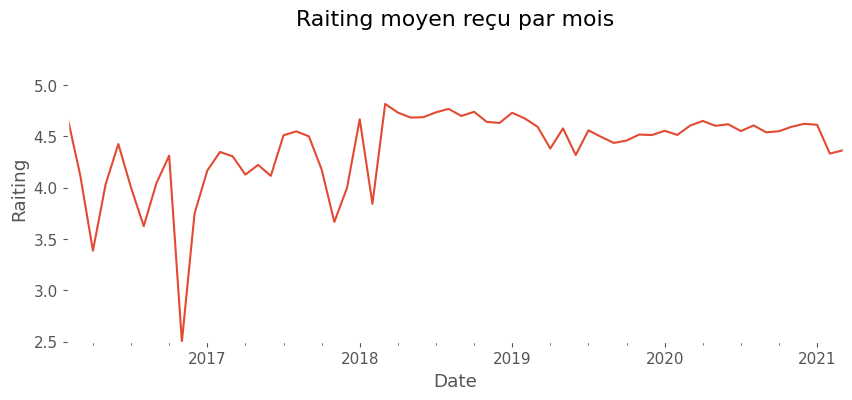

In [22]:
# 5. Série chronologique du score moyen par mois

df1 = df.groupby(['r_date']).agg({'r_raiting' : 'mean'})
df1.reset_index(inplace=True)
df1.dropna(axis=0, inplace = True)
df1 = df1.resample("M", on='r_date').mean()

# Graph
plt.rcParams["figure.dpi"] = 100
df1.plot(kind="line",figsize=(10,4)).set_facecolor('xkcd:white')
plt.ylabel('Raiting')
axes = plt.gca()
axes.set_ylim([3.5,5.5])
axes.get_legend().remove()
plt.yticks(np.arange(2.5, 5.5, 0.5))
plt.xlabel('Date')
plt.title('Raiting moyen reçu par mois')
plt.savefig('Raiting moyen reçu par Month.png', dpi = 300, bbox_inches = 'tight')

/var/folders/4b/g83qtk4x08nbc9j48pc6nkbc0000gn/T/ipykernel_59099/1112662773.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.loc[:, ~df.columns.isin(['id_', 'r_raiting', 'size'])].corr()


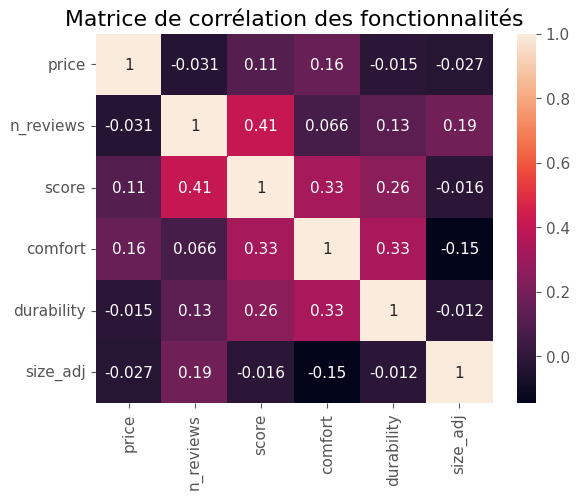

In [20]:
# 6. Graphique de corrélation entre prix, n_reviews, score, taille, confort, durabilité

fig, ax = plt.subplots(dpi = 100)
c= df.loc[:, ~df.columns.isin(['id_', 'r_raiting', 'size'])].corr()
sns.heatmap(c,annot=True)
plt.title('Matrice de corrélation des fonctionnalités')
plt.savefig('Correlation Graph.png', dpi = 300, bbox_inches = 'tight')